In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms

In [2]:
img1 = cv2.cvtColor(cv2.imread('NightVision.jpg'),cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('tajMahal.jpg'),cv2.COLOR_BGR2RGB)

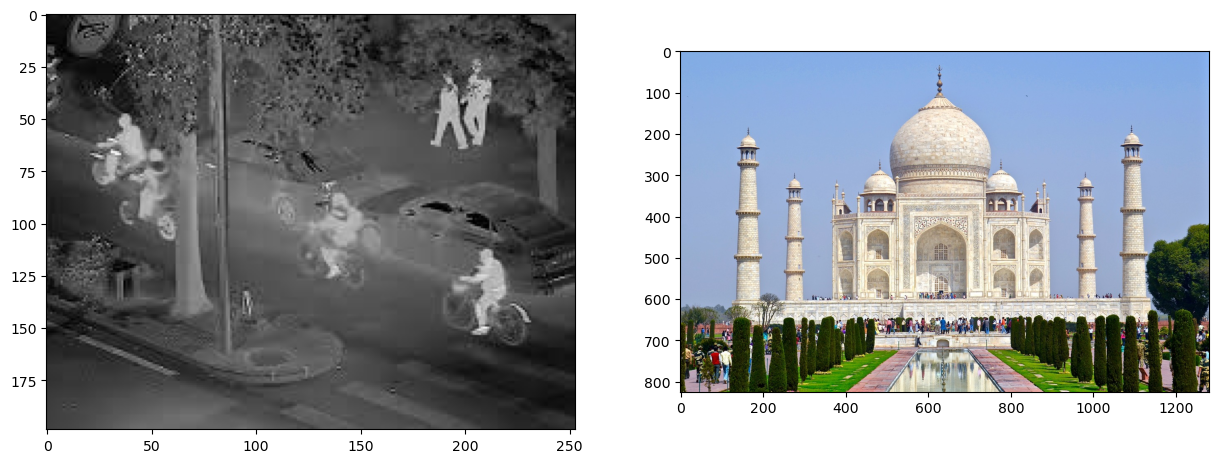

In [3]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)

In [4]:
sizee=img2.shape

### UNIFORM

In [5]:
uni = np.random.uniform(low=-150,high=0,size=sizee)
uni = uni.reshape(sizee)

In [6]:
uniform = img2+uni
uniform = np.clip(0,255,uniform).astype(np.uint8)

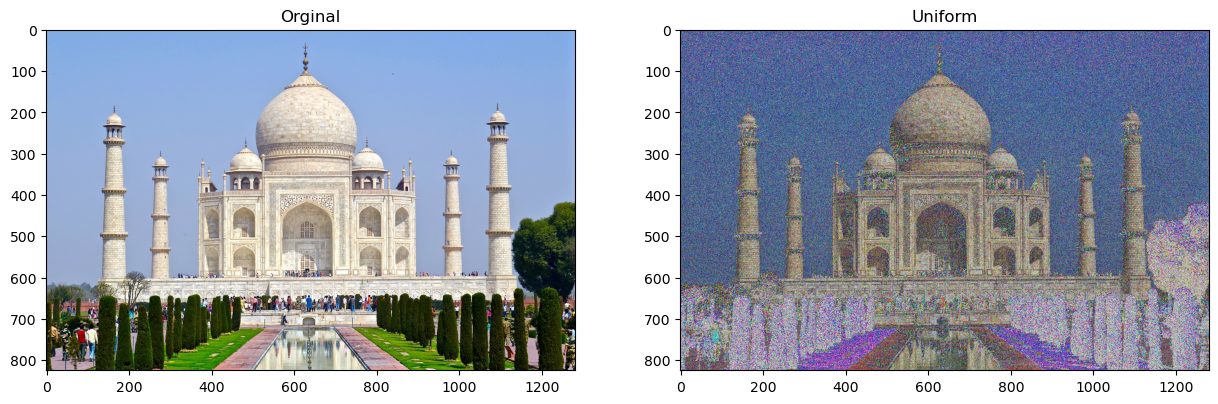

In [7]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title("Orginal")
plt.imshow(img2)
plt.subplot(1,2,2)
plt.title("Uniform")
plt.imshow(uniform)

### Gaussian

In [8]:
gauss = np.random.normal(0,50,sizee)

In [9]:
gaussian = img2+gauss
gaussian = np.clip(0,255,gaussian).astype(np.uint8)

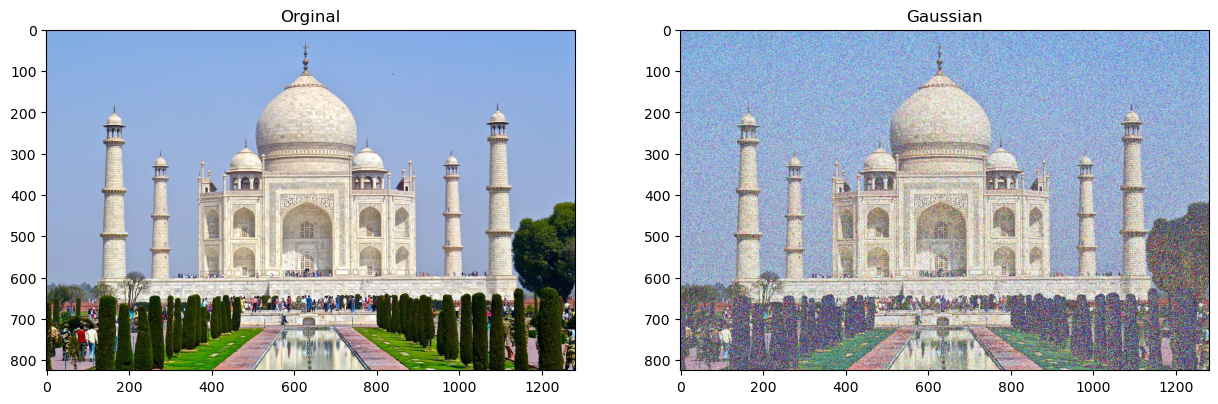

In [10]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title("Orginal")
plt.imshow(img2)
plt.subplot(1,2,2)
plt.title("Gaussian")
plt.imshow(gaussian)

### Salt & Pepper

In [11]:
cp = np.copy(img2)
salt = np.random.rand(*cp.shape[:2]) < 0.2
pepper = np.random.rand(*cp.shape[:2]) < 0.2
cp [salt] = 0
cp [pepper] = 255

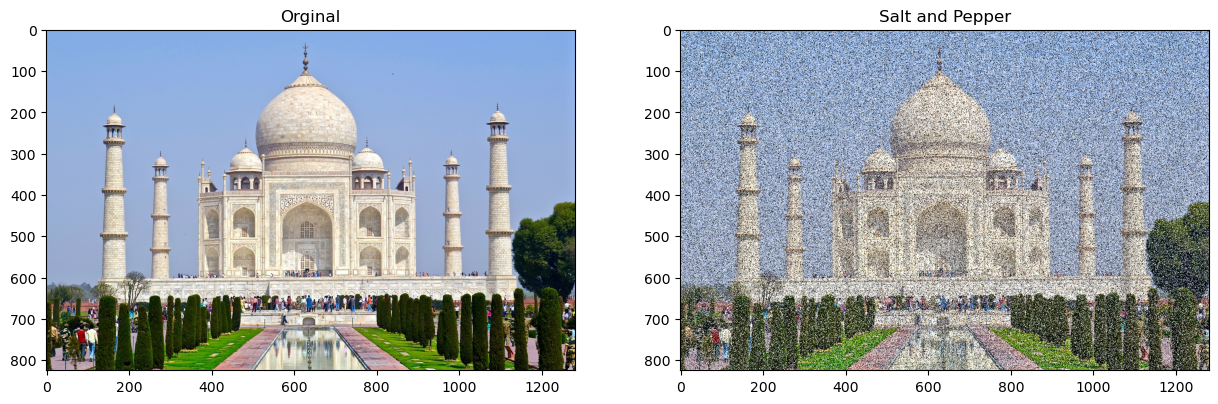

In [12]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title("Orginal")
plt.imshow(img2)
plt.subplot(1,2,2)
plt.title("Salt and Pepper")
plt.imshow(cp)

### Smoothing Filters

In [13]:
blur = cv2.blur(img2, (50, 50))  # Average blur
gaussian_blur = cv2.GaussianBlur(img2, (15, 15), 0)  # Gaussian blur
median_blur = cv2.medianBlur(img2, 5)  # Median blur

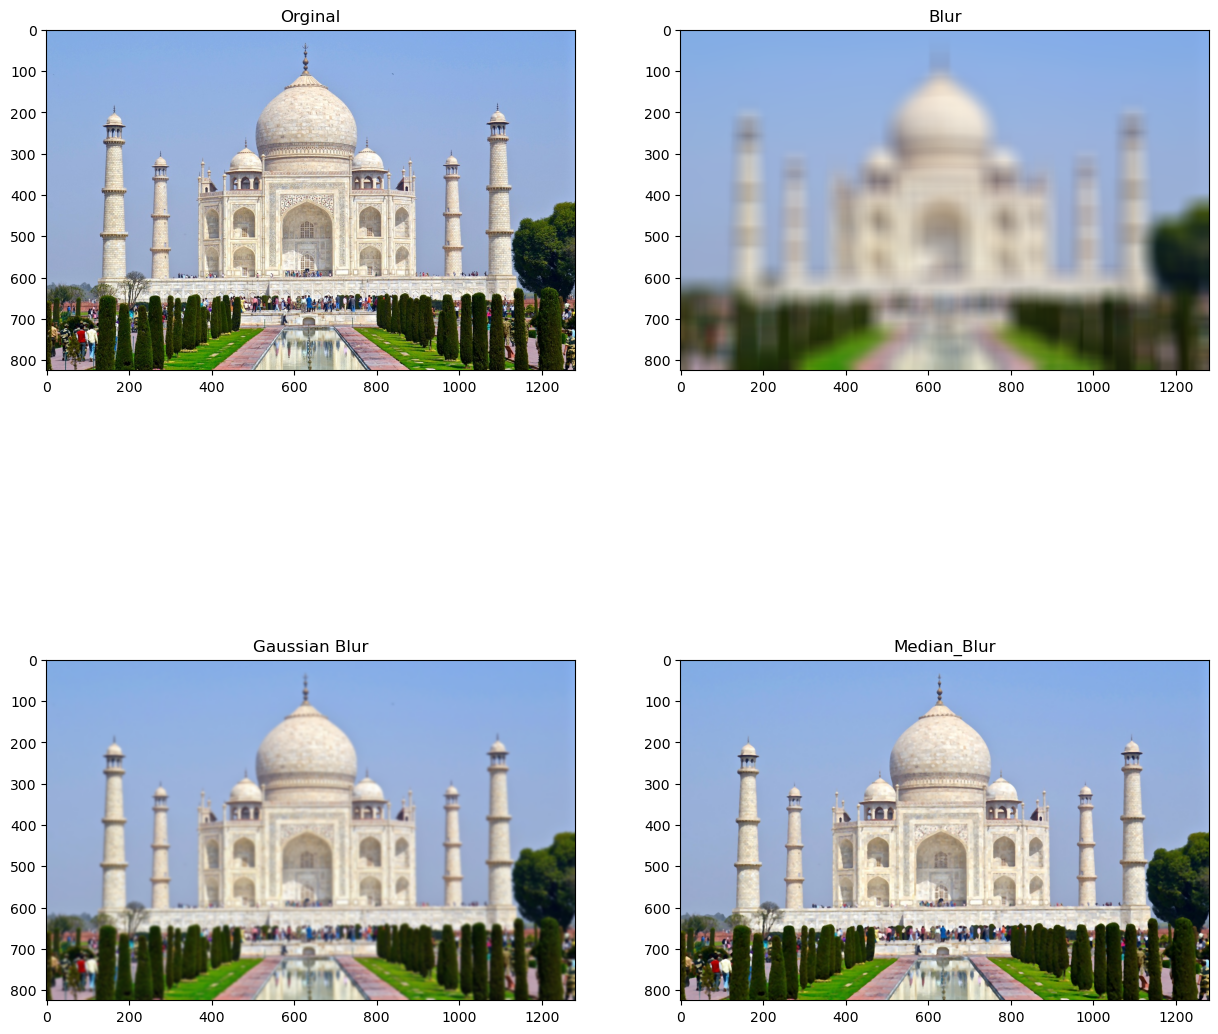

In [14]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title("Orginal")
plt.imshow(img2)
plt.subplot(2,2,2)
plt.title("Blur")
plt.imshow(blur)
plt.subplot(2,2,3)
plt.title("Gaussian Blur")
plt.imshow(gaussian_blur)
plt.subplot(2,2,4)
plt.title("Median_Blur")
plt.imshow(median_blur)

# Night vision image

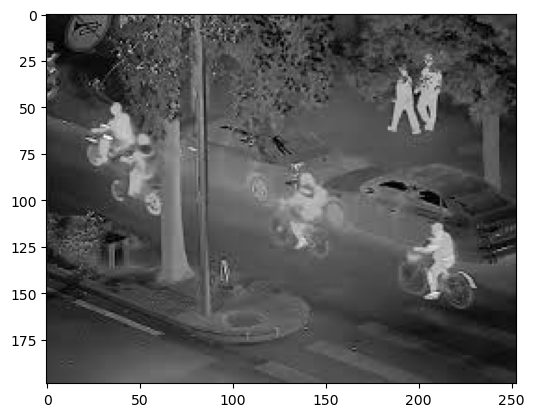

In [15]:
plt.imshow(img1)

In [16]:
def gamma(nightimg):
    invGamma = 1.3
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(nightimg, table)

In [17]:
gc=gamma(img1)

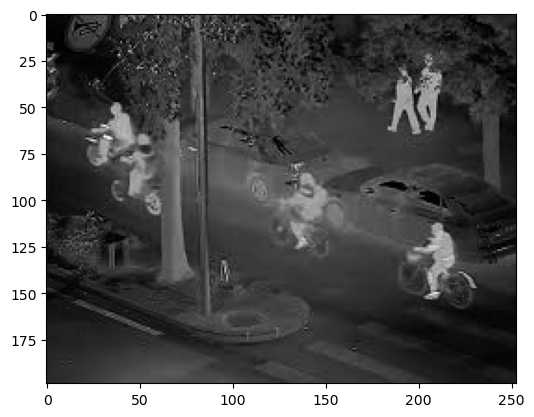

In [18]:
plt.imshow(gc)

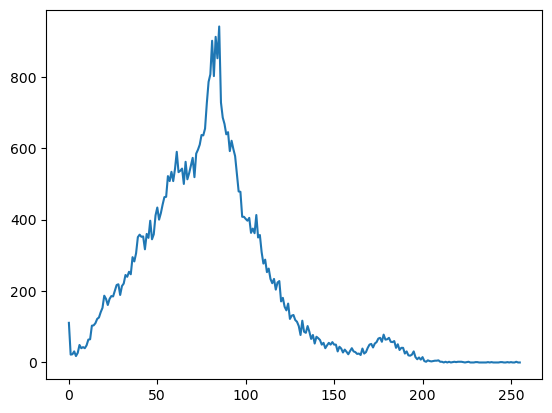

In [19]:
hist = cv2.calcHist([img1],[0],None,[256],[0,256])
plt.plot(hist)

In [20]:
hist2 = cv2.calcHist([gc],[0],None,[256],[0,256])

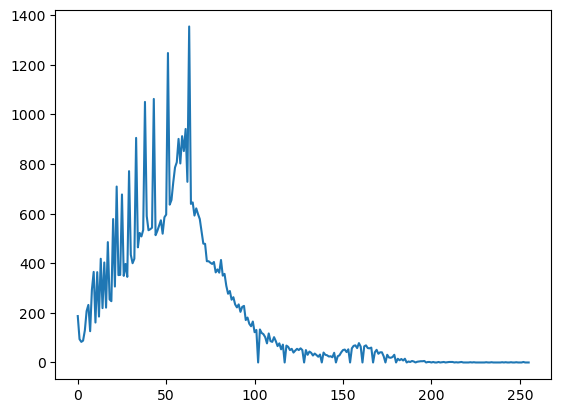

In [21]:
plt.plot(hist2)

Histogram matching

In [22]:
match=match_histograms(img1, img2).astype(np.uint8)

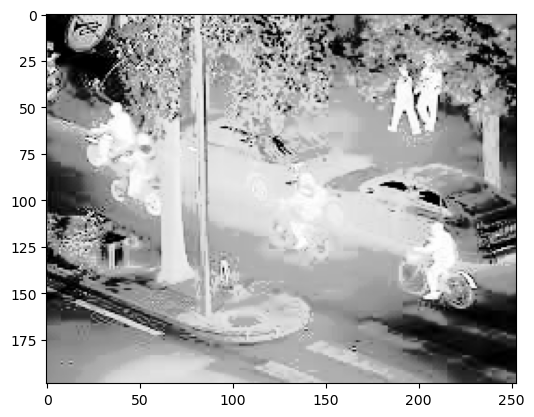

In [23]:
plt.imshow(match)

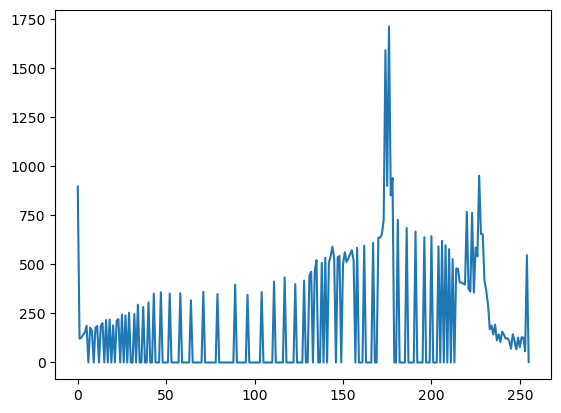

In [24]:
new_hist = cv2.calcHist([match], [0], None, [256], [0, 256])
plt.plot(new_hist)

Equalization

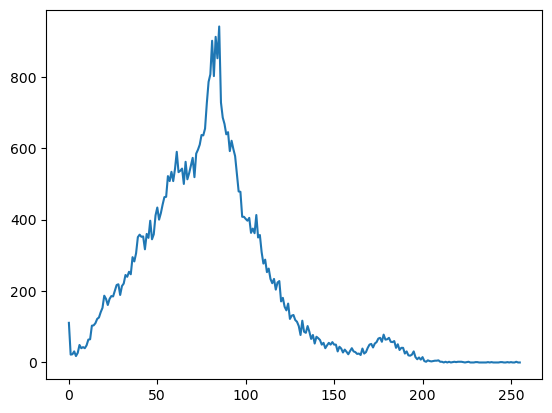

In [105]:
hist = cv2.calcHist([img1],[0],None,[256],[0,256])
plt.plot(hist)

In [28]:
night_img=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
equal= cv2.equalizeHist(night_img)

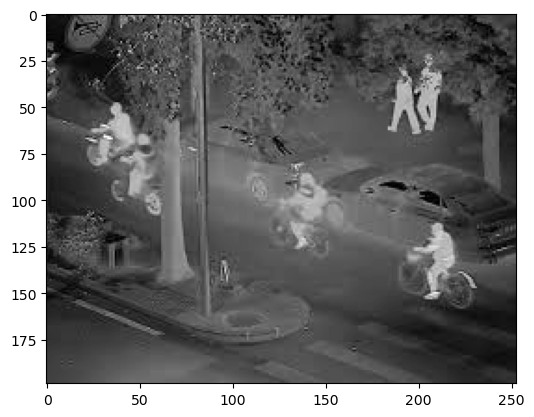

In [31]:
plt.imshow(night_img,cmap='gray')